Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [6]:
import pandas as pd
import numpy as np
data = {'animal':['cat','cat','snake','dog','dog','cat','snake','cat','dog','dog'],
       'age':[2.5,3,0.5,np.nan,5,2,4.5,np.nan,7,3],
       'visit':[1,3,2,3,2,3,1,1,2,1],'priority':['yes','yes','no','yes','no','no','no','yes','no','no']
       }
label=['a','b','c','d','e','f','g','g','h','i','j']
df = pd.DataFrame(data,columns = ['animal','age','visits','priority','label'])
df.set_index('label')

,animal,age,visits,priority
label,,,,
NaN,cat,2.5,NaN,yes
NaN,cat,3.0,NaN,yes
NaN,snake,0.5,NaN,no
NaN,dog,NaN,NaN,yes
NaN,dog,5.0,NaN,no
NaN,cat,2.0,NaN,no
NaN,snake,4.5,NaN,no
NaN,cat,NaN,NaN,yes
NaN,dog,7.0,NaN,no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [7]:
df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   animal    10 non-null     object 
 1   age       8 non-null      float64
 2   visits    0 non-null      object 
 3   priority  10 non-null     object 
 4   label     0 non-null      object 
dtypes: float64(1), object(4)
memory usage: 532.0+ bytes
  animal  age visits priority label
0    cat  2.5    NaN      yes   NaN
1    cat  3.0    NaN      yes   NaN
2  snake  0.5    NaN       no   NaN
3    dog  NaN    NaN      yes   NaN
4    dog  5.0    NaN       no   NaN
5    cat  2.0    NaN       no   NaN
6  snake  4.5    NaN       no   NaN
7    cat  NaN    NaN      yes   NaN
8    dog  7.0    NaN       no   NaN
9    dog  3.0    NaN       no   NaN


**3.** Return the first 3 rows of the DataFrame `df`.

In [8]:
print(df.iloc[:3])

  animal  age visits priority label
0    cat  2.5    NaN      yes   NaN
1    cat  3.0    NaN      yes   NaN
2  snake  0.5    NaN       no   NaN


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [9]:
df.loc[:,"age"]

0    2.5
1    3.0
2    0.5
3    NaN
4    5.0
5    2.0
6    4.5
7    NaN
8    7.0
9    3.0
Name: age, dtype: float64

**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [18]:
df.loc[[3,4,8],['animal','age']]

,animal,age
3,dog,NaN
4,dog,5.0
8,dog,7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [20]:
print(df[df['visits']>3])

Empty DataFrame
Columns: [animal, age, visits, priority, label]
Index: []


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [21]:
print(df[df['age'].isnull()])

  animal  age visits priority label
3    dog  NaN    NaN      yes   NaN
7    cat  NaN    NaN      yes   NaN


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [26]:
print(df[(df['animal']=='cat')&(df['age']<3)])

  animal  age visits priority label
0    cat  2.5    NaN      yes   NaN
5    cat  2.0    NaN       no   NaN


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [28]:
df[df['age'].between(2,4)]

,animal,age,visits,priority,label
0,cat,2.5,NaN,yes,NaN
1,cat,3.0,NaN,yes,NaN
5,cat,2.0,NaN,no,NaN
9,dog,3.0,NaN,no,NaN


**10.** Change the age in row 'f' to 1.5.

In [33]:
df.loc['f','age']=1.5

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [36]:
df['visits'].sum()

0

**12.** Calculate the mean age for each different animal in `df`.

In [37]:
df.groupby('age')['age'].mean()

age
0.5    0.5
1.5    1.5
2.0    2.0
2.5    2.5
3.0    3.0
4.5    4.5
5.0    5.0
7.0    7.0
Name: age, dtype: float64

**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [47]:
df.loc['k']=['dog',5.5,2,'no','k']
df=df.drop('k')

**14.** Count the number of each type of animal in `df`.

In [49]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [52]:
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority,label
8,dog,7.0,NaN,no,NaN
4,dog,5.0,NaN,no,NaN
6,snake,4.5,NaN,no,NaN
1,cat,3.0,NaN,yes,NaN
9,dog,3.0,NaN,no,NaN
0,cat,2.5,NaN,yes,NaN
5,cat,2.0,NaN,no,NaN
f,NaN,1.5,NaN,NaN,NaN
2,snake,0.5,NaN,no,NaN
3,dog,NaN,NaN,yes,NaN


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [61]:
df['priority']=df['priority'].map({'yes':True,'no':False})
print(df)

   animal  age visits priority label
0     cat  2.5    NaN      NaN   NaN
1     cat  3.0    NaN      NaN   NaN
2  python  0.5    NaN      NaN   NaN
3     dog  NaN    NaN      NaN   NaN
4     dog  5.0    NaN      NaN   NaN
5     cat  2.0    NaN      NaN   NaN
6  python  4.5    NaN      NaN   NaN
7     cat  NaN    NaN      NaN   NaN
8     dog  7.0    NaN      NaN   NaN
9     dog  3.0    NaN      NaN   NaN
f     NaN  1.5    NaN      NaN   NaN


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [60]:
df['animal']=df['animal'].replace('snake','python')
print(df)

   animal  age visits priority label
0     cat  2.5    NaN      NaN   NaN
1     cat  3.0    NaN      NaN   NaN
2  python  0.5    NaN      NaN   NaN
3     dog  NaN    NaN      NaN   NaN
4     dog  5.0    NaN      NaN   NaN
5     cat  2.0    NaN      NaN   NaN
6  python  4.5    NaN      NaN   NaN
7     cat  NaN    NaN      NaN   NaN
8     dog  7.0    NaN      NaN   NaN
9     dog  3.0    NaN      NaN   NaN
f     NaN  1.5    NaN      NaN   NaN


**18.** Load the ny-flights dataset to Python

In [4]:
import pandas as pd
df1=pd.read_csv(r'C:\Users\Jashi\Downloads\ny-flights.csv')
df1

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00


**19.** Which airline ID is present maximum times in the dataset

In [15]:
(df1['airline_id']).mode()

0    20409
Name: airline_id, dtype: int64

**20.** Draw a plot between dep_delay and arr_delay

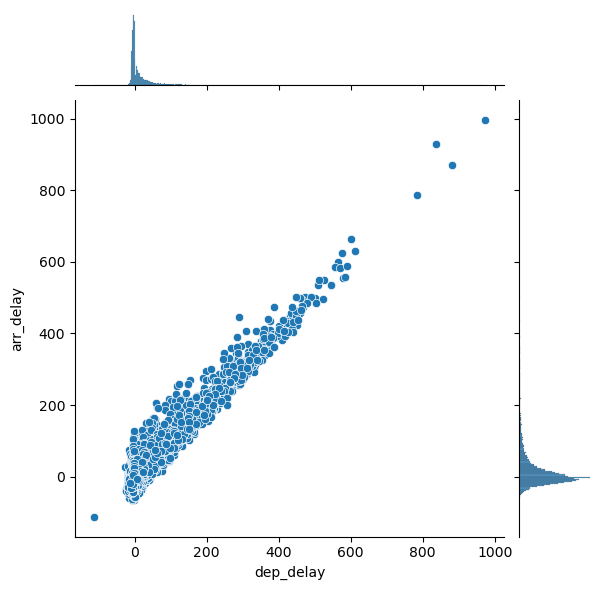

In [11]:
import seaborn as sns
sns.jointplot(data=df1,x="dep_delay",y="arr_delay")